# Tarea 4 (Estimación y prueba de hipótesis)

### Problema 1

**Una empresa que envasa café instantáneo afirma que sus frascos contienen, en promedio, 100 gramos de café. Un inspector de calidad sospecha que la máquina de llenado está subllenando los frascos, por lo que el peso promedio es menor a 100 gramos. Para demostrarlo el inspector toma una muestra aleatoria de 15 frascos y encuentra los siguientes resultados: Media muestral gramos de 98.5 y una desviación estándar muestral s=5.2 gramos. Con lo que va con la gerencia de producción y le presenta los resultados para respaldar su sospecha. ¿Los datos realmente apoyan con una confianza del 95% la sospecha del inspector? Haga los análisis pertinentes.**

Para resolver este problema, primero definimos las hipótesis nula y alternativa:

- $H_0$: μ = 100 gramos 
- $H_A$: μ < 100 gramos

Luego, calculamos el valor t utilizando la fórmula:
$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

In [123]:
import math
from scipy import stats

n = 15
x_barra = 98.5
s = 5.2
mu_0 = 100
alpha = 0.05
gl = n - 1

In [124]:
t = (x_barra - mu_0) / (s / math.sqrt(n))
print("Valor t calculado:", t)

Valor t calculado: -1.1172067344829089


Como podemos ver, nuesto valor t calculado es aproxímadamente -1.117, por lo que ahora debemos de obtener el valor crítico t para un nivel de significancia de $\alpha = 0.05$ y grados de libertad $gl = 14$. Para esto nos apoyaremos de la funcion ppf de la librería scipy.stats:


In [125]:
v_critico = stats.t.ppf(alpha, df=n-1)
print("Valor crítico t:", v_critico)

Valor crítico t: -1.7613101357748564


En este caso, el valor critico de t es aproximadamente -1.761. Con esto ya podriamos descartar la hipotesis nula, ya que nuestro valor t calculado no se encuentra en la región de rechazo, pero aun nos falta calcular el intervalo de confianza para corroborar nuestros resultados.

In [126]:
ic_95 = (x_barra - stats.t.ppf(0.975, df=n-1) * (s / math.sqrt(n)),
          x_barra + stats.t.ppf(0.975, df=n-1) * (s / math.sqrt(n)))
print("IC 95%:", ic_95)

IC 95%: (np.float64(95.62033598386387), np.float64(101.37966401613613))


El intervalo de confianza resultante fue de (95.62, 101.38), y la media muestral era de 98.5 que se encuentra dentro del intervalo, por lo que no podemos rechazar la hipótesis nula. Por lo tanto, no hay suficiente evidencia para apoyar la sospecha del inspector de que la máquina de llenado está subllenando los frascos.

---

### Problema 2
**Una empresa de tecnología está planeando el lanzamiento de un nuevo modelo. Antes del lanzamiento oficial, la empresa afirma que la proporción de consumidores que preferirá el nuevo modelo será del 60%. Un analista de mercado sospecha que la proporción real es diferente de esta afirmación. El analista realiza un estudio con una muestra aleatoria de consumidores. Usa un tamaño de muestra n=220 personas, y el número de personas que claramente prefieren el nuevo modelo es de 121. Con lo que afirma que en realidad el porcentaje de personas que preferirá el nuevo modelo es menor al 60%, ¿es correcta la afirmación con una confianza del 95%? Haga el análisis pertinente.**

Primero, definimos las hipótesis nula y alternativa:
- $H_0$: p = 0.6
- $H_A$: p < 0.6

In [127]:
import math
from scipy import stats

p0 = 0.6
n = 220
x = 121
alpha = 0.05

Las sospechas del analista dicen que de una muestra de 220 personas, 121 prefieren el nuevo modelo, por lo que la probabilidad muestral es:

In [128]:
p_hat = x / n
print("Probabilidad alterna:", p_hat)

Probabilidad alterna: 0.55


Para probar esta hipotesis, calculamos el valor z utilizando la fórmula:
$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}$

In [129]:
z = (p_hat - p0) / math.sqrt(p0 * (1 - p0) / n)
print("Valor z calculado:", z)

Valor z calculado: -1.5138251770487439


Nuestro valor z calculado es aproximadamente -1.51, por lo que ahora debemos de obtener el valor crítico z para un nivel de significancia de $\alpha = 0.05$. Para esto nos apoyaremos de la funcion ppf de la librería scipy.stats

In [130]:
valor_critico = stats.norm.ppf(alpha)
print("Valor crítico z:", valor_critico)

Valor crítico z: -1.6448536269514729


El valor critico de z resultante es de aproximadamente -1.645. Dado que nuestro valor z calculado (-1.51) no se encuentra en la región de rechazo (z < -1.645), no podemos rechazar la hipótesis nula. Pero aun nos falta calcular el intervalo de confianza para corroborar nuestros resultados.

In [131]:
ic_95 = ( (p_hat) - stats.norm.ppf(0.975) * math.sqrt((p_hat)*(1 - p_hat)/n),
          (p_hat) + stats.norm.ppf(0.975) * math.sqrt((p_hat)*(1 - p_hat)/n) )
print("IC 95%:", ic_95)

IC 95%: (np.float64(0.4842608094567564), np.float64(0.6157391905432437))


Y como se puede ver, nuestro intervalo esta entre (0.48 y 0.61), por lo que el valor visto por el analista de 0.55 se encuentra dentro del intervalo, por lo que no podemos rechazar la hipótesis nula.

---

### Problema 3 
**Con los datos de ENSANUT 2018 se tiene interés en analizar la cintura de hombres y mujeres entre 25 y 65 años de edad de los estados de 1 AGUASCALIENTES, 6 COLIMA, 11 GUANAJUATO, 14 JALISCO, 16 MICHOACÁN, 18 NAYARIT. Una circunferencia de cintura mayor a 90 cm se considerar un indicador de posible obesidad abdominal.**
- a. Obtenga los datos correspondientes, de ser necesario límpielos.
- b. Haga un análisis descriptivo de la cintura de la muestra. Comente los aspectos más relevantes.
- c. Obtenga los cuantiles 0.025 y 0.975 de la muestra, e interprete.
- d. Obtenga un intervalo de confianza para la media poblacional, e interprete (enfatizando el error de
estimación).

#### Inciso A

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('EnsanutMediciones.xls')

Primeramente vamos a quedarnos con la informacion del dataframe que nos interesa, en este caso el sexo, edad, entidad y cintura. Despues hacemos una correccion en cuanto a los tipos de datos, ya que algunos vienen como tipo string. Finalmente eliminamos los valores nulos de la columna a analizar, en este caso cintura, y para esto hay que quitar tanto los valores en blanco como los que son iguales a 222.2, ya que segun el catalogo de la encuesta, este valor indica que no se realizó la medicion.

In [133]:
columnas = ['sexo', 'edad', 'peso', 'cintura', 'entidad']
df = df[columnas]

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df = df[df['cintura'] != 222.2]
df.dropna(subset=['cintura'], inplace=True)

Una vez que limpiamos los datos, toca filtrar la informacion a lo que nos interesa, en este caso edades de 25 a 65 y de los estados de Aguascalientes, Colima, Guanajuato, Jalisco, Michoacan y Nayarit.

In [134]:
df = df[(df['edad'] >= 25) & (df['edad'] <= 65)]
df = df[(df['entidad'] == 1) | 
        (df['entidad'] == 6) | 
        (df['entidad'] == 11) | 
        (df['entidad'] == 14) |
        (df['entidad'] == 16) |
        (df['entidad'] == 18)]

#### Inciso B

Segun el analisis de los datos de cintura en la sub-poblacion que seleccionamos, tenemos lo siguiente:

In [135]:
df['cintura'].describe()

count    749.000000
mean      96.749666
std       12.669901
min       69.000000
25%       88.000000
50%       96.500000
75%      104.100000
max      150.900000
Name: cintura, dtype: float64

Tenemos una media de 96, lo cual es superior al valor indicado de obesidad para medida de cintura, la desviacion estandar de 12.6 nos puede indicar una dispersion alta de los datos o que existen valores atipicos en alguna de las colas. Los cuartiles de 88-96-104 son un indicador mas de que la poblacion mustra indices altos de obesidad, ya que para el caso mas bajo (25%) tenemos un valor muy cercano al limite de lo que consideramos una persona obesa segun su cintura. En cuanto a los minimos y maximos tambien se ven valores preocupantes, debido a que el minimo es apenas 21 cm menos que el limite, mientras que el maximo está en 60 cm por encima del limite y quizá es en esta cola derecha de la distribucion que tenemos la mayor cantidad de valores atipicos.

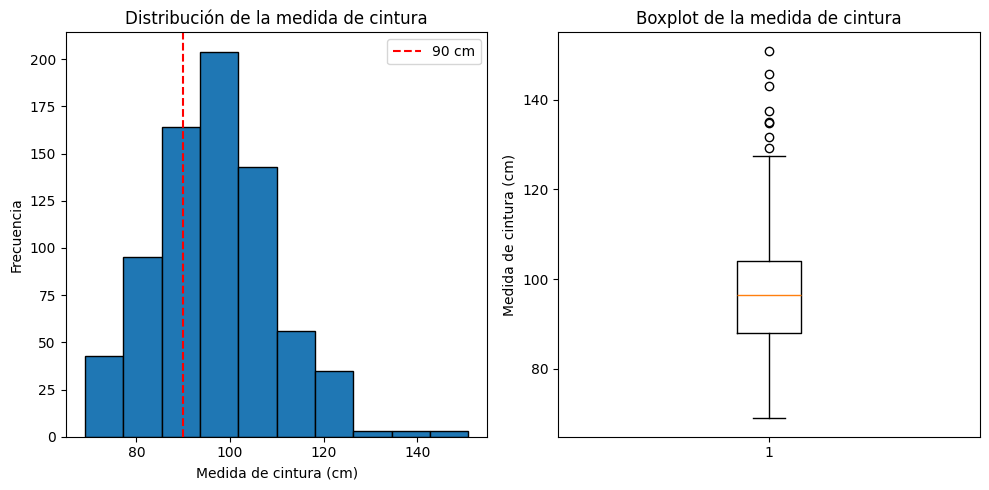

In [136]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['cintura'], edgecolor='black')
plt.title('Distribución de la medida de cintura')
plt.xlabel('Medida de cintura (cm)')
plt.ylabel('Frecuencia')
plt.axvline(x=90, color='r', linestyle='--', label='90 cm')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['cintura'])
plt.title('Boxplot de la medida de cintura')
plt.ylabel('Medida de cintura (cm)')

plt.tight_layout()
plt.show()

Ya viendo las graficas de distribucion y cajas/bigotes se observa claramente lo que comentabamos anteriormente, y es que hay una cola larga a la derecha de valores bastante altos de medida de cintura, y gracias a la linea punteada podemos ver como es que la mediana sobrepasa los valores de obesidad.

#### Inciso C

In [137]:
quantiles = df['cintura'].quantile([0.025, 0.975])
print(f"Cuantiles: \n{quantiles}", )

Cuantiles: 
0.025     74.14
0.975    124.50
Name: cintura, dtype: float64


In [138]:
n = len(df['cintura'])
x_barra = df['cintura'].mean()
s = df['cintura'].std()
alpha = 0.05
gl = n - 1
ic_95 = (x_barra - stats.t.ppf(0.975, df=gl) * (s / math.sqrt(n)),
          x_barra + stats.t.ppf(0.975, df=gl) * (s / math.sqrt(n)))
print(f"IC 95%: {ic_95}")

error_estimacion = (ic_95[1] - ic_95[0]) / 2
print(f"Error de estimación: {error_estimacion:.2f}%")

IC 95%: (np.float64(95.84083406525406), np.float64(97.65849837800363))
Error de estimación: 0.91%


---

### 4. En relación con las personas de la muestra cuya cintura tiene más de 90 cm.
- a. Calcule el porcentaje de personas en la muestra cuya cintura tiene más de 90 cm.
- b. Estime un intervalo de confianza al 95% para el correspondiente porcentaje poblacional anterior, e interprételo (enfatizando el error de estimación).

#### Inciso A

In [139]:
p_obes = (df['cintura'] > 90).mean() * 100
print(f"Porcentaje de obesidad: {p_obes:.2f}%")

Porcentaje de obesidad: 67.16%


#### Inciso B

In [140]:
ic_95_obesidad = (p_obes - stats.norm.ppf(0.975) * math.sqrt((p_obes/100)*(1 - p_obes/100)/n) * 100,
                   p_obes + stats.norm.ppf(0.975) * math.sqrt((p_obes/100)*(1 - p_obes/100)/n) * 100)
print(f"IC 95% para el porcentaje de obesidad: {ic_95_obesidad}")

error_estimacion = (ic_95_obesidad[1] - ic_95_obesidad[0]) / 2
print(f"Error de estimación: {error_estimacion:.2f}%")

IC 95% para el porcentaje de obesidad: (np.float64(63.79282074089127), np.float64(70.51959581451592))
Error de estimación: 3.36%


---